<center><h1>Investment Analysis for Spark Funds</h1></center>

## Objectives and Business Understanding
<pre>
<b>Spark Funds has two minor constraints for investments:</b>

It wants to invest between 5 to 15 million USD per round of investment.
It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in. 

For our analysis, consider a country to be English speaking only if English is one of the official languages in that country. These conditions will give us sufficient information for ur initial analysis. Before getting to specific questions, let’s understand the problem and the data first.

<b>1. What is the strategy?</b>

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

<b>2. Where did we get the data from? </b>

We have taken real investment data from crunchbase.com, so the insights we get may be incredibly useful. For this assignment, we have divided the data into the following files:
 
<b>3. What is Spark Funds’ business objective?</b>

The business objectives and goals of data analysis are pretty straightforward.

<b>Business objective:</b> The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.
<b>Goals of data analysis:</b> Our goals are divided into three sub-goals:
<b>Investment type analysis:</b> Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
<b>Country analysis:</b> Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
<b>Sector analysis:</b> Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, we will need to map each sub-sector to its main sector.)
</pre>

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import seaborn as sns

# Checkpoint 1 : Data Cleaning

In [2]:
# Read Csv files
companies = pd.read_csv("companies.csv",engine='python')
rounds2 = pd.read_csv("rounds2.csv",engine='python')

In [3]:
# Preview companies data
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# Preview rounds2 data
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


 <b>Observation</b><br>
 Now we need to merge two data frames based on the best column that would match as key. 
 On analysis <b>permalink</b> and <b>company_permalink</b> seems to be having companies id in both dataframe respectively. <br><br>Since merge is case censitive we need do some tuning to the key values by striping the <b>white space</b> and setting to <b>lower/upper case</b>

In [5]:
rounds2['company_permalink'] = rounds2.company_permalink.str.lower().str.strip()
companies['permalink'] = companies.permalink.str.lower().str.strip()
(rounds2['company_permalink'].tail(),companies['permalink'].tail())

(114944                            /organization/zzzzapp-com
 114945                            /organization/zzzzapp-com
 114946                                 /organization/ã�eron
 114947                               /organization/ã”asys-2
 114948    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
 Name: company_permalink, dtype: object,
 66363    /organization/zznode-science-and-technology-co...
 66364                            /organization/zzzzapp-com
 66365                                 /organization/ã�eron
 66366                               /organization/ã”asys-2
 66367    /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...
 Name: permalink, dtype: object)

We can still see special characters in our permalinks columns... lets handle the <b>special characters</b> by encoding with ignoring ascii which will remove the special charcaters to make it readable and compatible

In [6]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('ascii', 'ignore')
companies['permalink'] = companies.permalink.str.encode('ascii', 'ignore')
(rounds2['company_permalink'].tail(),companies['permalink'].tail())

(114944                         b'/organization/zzzzapp-com'
 114945                         b'/organization/zzzzapp-com'
 114946                                b'/organization/eron'
 114947                              b'/organization/asys-2'
 114948    b'/organization/novatiff-reklam-ve-tantm-hizme...
 Name: company_permalink, dtype: object,
 66363    b'/organization/zznode-science-and-technology-...
 66364                         b'/organization/zzzzapp-com'
 66365                                b'/organization/eron'
 66366                              b'/organization/asys-2'
 66367    b'/organization/novatiff-reklam-ve-tantm-hizme...
 Name: permalink, dtype: object)

Okay now the special characters are gone but we see that the values are converted to byte string now lets simply convert the byte string to a normal string

In [7]:
rounds2['company_permalink'] = rounds2.company_permalink.str.decode('unicode_escape')
companies['permalink'] = companies.permalink.str.decode('unicode_escape')
(rounds2['company_permalink'].tail(),companies['permalink'].tail())

(114944                            /organization/zzzzapp-com
 114945                            /organization/zzzzapp-com
 114946                                   /organization/eron
 114947                                 /organization/asys-2
 114948    /organization/novatiff-reklam-ve-tantm-hizmetl...
 Name: company_permalink, dtype: object,
 66363    /organization/zznode-science-and-technology-co...
 66364                            /organization/zzzzapp-com
 66365                                   /organization/eron
 66366                                 /organization/asys-2
 66367    /organization/novatiff-reklam-ve-tantm-hizmetl...
 Name: permalink, dtype: object)

Great now the columns are cleaned wihout any special characters... lets proceed with other observations before we merge these dataset

### Tabel 1.1 : Understand the Data Set
As now the key column is clean, lets find the number of unique companies from each of the dataframes

In [8]:
rounds2['company_permalink'].nunique()

66368

In [9]:
companies['permalink'].nunique()

66368

In [10]:
# check if any company in rounds2 df are not in companies df
pd.DataFrame(rounds2['company_permalink'].unique()).loc[~pd.Series(rounds2['company_permalink'].unique()).isin(pd.Series(companies['permalink'].unique())),:]

,0


In [11]:
# check if any company in companies df are not in rounds2 df
pd.DataFrame(companies['permalink'].unique()).loc[~pd.Series(companies['permalink'].unique()).isin(pd.Series(rounds2['company_permalink'].unique())),:]

,0


As the dataset is clean and hopefully perfect for merge, lets merge rounds2 and companies with left join, 'cause lets not miss values from our rounds2 dataframe with other types of join

In [12]:
# Merge the rounds2 and cmpanies dataframe
master_frame = rounds2.merge(companies,left_on='company_permalink',right_on='permalink',how='left')

In [13]:
master_frame.shape

(114949, 16)

In [14]:
#Function to check null percentage
def check_null_percentage(df):
    null_data = pd.DataFrame(df.isnull().sum()).reset_index()
    null_data.columns = ['Features','Missing_Percent']
    null_data['Missing_Percent'] = null_data['Missing_Percent'].apply(lambda x: x / df.shape[0] * 100)
    null_data.sort_values('Missing_Percent',ascending=False,inplace=True)
    return null_data[null_data['Missing_Percent'] > 0.0].reset_index(drop=True)

In [15]:
check_null_percentage(master_frame)

,Features,Missing_Percent
0,funding_round_code,72.909725
1,founded_at,17.852265
2,raised_amount_usd,17.390321
3,state_code,9.522484
4,region,8.844792
5,city,8.842182
6,country_code,7.549435
7,homepage_url,5.336280
8,category_list,2.966533
9,name,0.000870


In [16]:
# Removing these columns as it has high percentage of missing values and some of these are unnecessary feature
master_frame.drop(['funding_round_code','founded_at','funded_at','status','homepage_url'],inplace=True,axis=1)

# Checkpoint 2 : Funding Type Analysis

We need to filter out the Nan values before finding the total number of funding types as we are taking the funding types for the invest that has been done

In [17]:
# filtering out the nan values from raised_amount_usd
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [18]:
check_null_percentage(master_frame)

,Features,Missing_Percent
0,state_code,8.007666
1,region,7.422151
2,city,7.418991
3,country_code,6.161607
4,category_list,1.099422
5,name,0.001053


Now we have removed the null values to have the raised amount usd null free.

Sparks funds wants to choose only four of these Investment Types venture, angel, seed, and private equity... thus filtering our dataset with only these four types of investments

In [19]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

### Table 2.1 Representative Values of Investments for Each of these Funding Types

In [20]:
master_frame.funding_round_type.value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

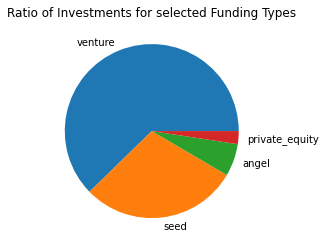

In [21]:
master_frame.funding_round_type.value_counts().plot.pie();
plt.title("Ratio of Investments for selected Funding Types")
plt.ylabel('');

<b>Observation:</b><br>
Venture has more number of investments overall<br><br>
Lets also see if we have <b>outliers</b> for each fundings as we have to select the best funding type based on mean / median

In [22]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].describe().astype(str)

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,958694.4697530865,7404397.122129396,0.0,150000.0,400000.0,1000000.0,494511992.0
private_equity,1936.0,73308593.02944215,198113458.41372654,0.0,5000000.0,20000000.0,75000000.0,4745460219.0
seed,23603.0,719817.9969071728,2221732.800078657,0.0,55000.0,275000.0,1000000.0,200000000.0
venture,50228.0,11748949.129489528,86352066.55796298,0.0,1600901.75,5000000.0,12000000.0,17600000000.0


Now we have find a way to analyse and come up with a analysis to find a funding type that best fits betwen 5M to 15M as Spark funds are will to invest in companies between that range 

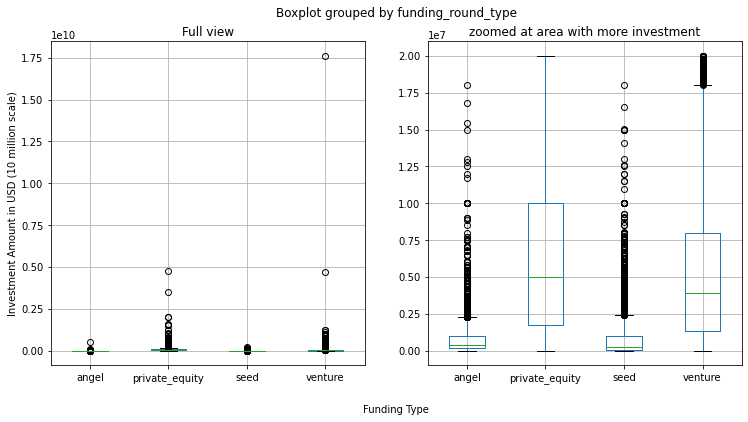

In [23]:
# From the above table it shows than most of the values lie below 20000000 so lets plot a box plot and see if there aren't any extreme outliers
fig , ax = plt.subplots(1,2,figsize=(12,6))
master_frame.set_index('funding_round_type').boxplot(by='funding_round_type',column='raised_amount_usd',ax=ax[0]);
ax[0].set_ylabel('Investment Amount in USD (10 million scale)')
master_frame[master_frame.raised_amount_usd < 20000000].set_index('funding_round_type').boxplot(by='funding_round_type',column='raised_amount_usd', ax=ax[1]);
plt.style.use('default')
#plt.title("Boxplot representation for Funding Type");
ax[0].set_title('Full view')
ax[1].set_title('zoomed at area with more investment')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
fig.text(0.5, 0.04, 'Funding Type', ha='center');

The above plot gives us a clean view on investment amounts without any extreme outliers<br>
Since we have outliers we can go with median but before that lets compare mean and median values closely

In [24]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(['mean','median']).apply(lambda x: x.apply(lambda y: float('%.1f' % np.round(y,1))))

,mean,median
funding_round_type,,
angel,958694.5,400000.0
private_equity,73308593.0,20000000.0
seed,719818.0,275000.0
venture,11748949.1,5000000.0


From the above table we can clearly say that it will be a good decision to go with median as the mean value is too high becusae of outliers. As it best fits the investment amoutn condition for 5M - 15M

In [25]:
# filtering our values to new dataframe with venture as it lies between 5M to 15M 
master_frame_ft = master_frame[master_frame["funding_round_type"] == 'venture']

# Checkpoint 3 : Country Analysis

In [26]:
# removing these columns as we now know that only country_code column will be made use 
# as Spark funds wantes to to find the top9 countries
master_frame_ft = master_frame_ft.drop(['region','city','state_code'],axis=1)

In [27]:
# Finding top 9 countries with most raised amount
master_frame_ft.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype(str).index[:9]

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'], dtype='object', name='country_code')

In [28]:
# take the top 9 countries to a new dataFrame
top9 = master_frame_ft[master_frame_ft.country_code.isin(master_frame_ft.groupby('country_code')['raised_amount_usd'].sum().sort_values().astype(str).index[-9:])]

In [29]:
# for analysis finding the number of investments in each country
top9.country_code.value_counts()

USA    36139
GBR     2055
CHN     1564
CAN     1256
FRA      917
IND      824
ISR      796
DEU      558
JPN      274
Name: country_code, dtype: int64

In [30]:
# Read english speaking countries from wiki page
countries_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language')
# Downloaded country data for iso from https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region
country_iso = pd.read_csv('continents2.csv')

In [31]:
# removing unnecessary coulmns since we need only alpha-3 value and its country name
country_iso = country_iso[['name','alpha-3']]

In [32]:
# filter the HTML dataframe tables and map it to a new Series containing the english speaking country list
country_en = pd.Series([],dtype=pd.StringDtype())
for i in range(0,6):
    if i <= 2:
        country_en = country_en.append(countries_df[i].Country)
    else:
        country_en = country_en.append(countries_df[i].Entity)

In [33]:
# Remove additional characters and numbers
country_en = country_en.str.replace('\[.*$','',regex=True)
country_en = country_en.str.replace('[\d]*$','',regex=True)
# Change it to uppdercase and trim spaces
country_en = country_en.str.upper().str.strip()

In [34]:
# filter the country data for english speaking countries that we got
country_iso = country_iso[country_iso.name.str.upper().str.strip().isin(country_en)]

In [35]:
# check if any countries data are missing from the Kaggle dataset
missing_data = pd.DataFrame([])
missing_data['name'] = country_en[~country_en.isin(country_iso.name.str.upper().str.strip())]
missing_data

,name
26,MICRONESIA
2,BRUNEI
0,AKROTIRI AND DHEKELIA
4,BRITISH VIRGIN ISLANDS
8,FALKLAND ISLANDS
17,PITCAIRN ISLANDS
19,ROTUMA
20,SINT MAARTEN
22,U.S. VIRGIN ISLANDS
2,MACAU


In [36]:
# retrieved the missing values referred from iso.org
missing_data['alpha-3'] = np.array(['FSM','BRN','','VGB','FLK','PCN','','SXM','VIR','MAC'])

In [37]:
# Append the missing data to country data 
country_iso = country_iso.append(missing_data).reset_index(drop=True)

In [38]:
# Filter the top9 dataframe for countries that speaks english as offical language
top9_en = top9[top9.country_code.isin(country_iso['alpha-3'])]

In [39]:
# Find the top 3 countries english speaking countires that has higher raise amount
top9_en.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype(str)

country_code
USA    422510842796.0
GBR     20245627416.0
IND     14391858718.0
CAN      9583332317.0
ISR      6907514579.0
Name: raised_amount_usd, dtype: object

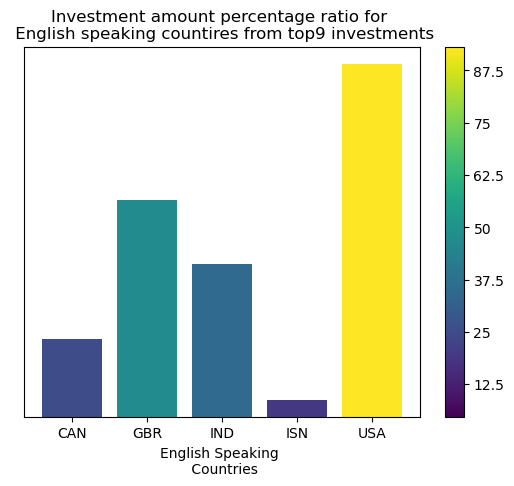

In [40]:
top9_sum = top9_en.groupby('country_code')['raised_amount_usd'].sum()
top9_sum['USA'] = top9_sum['USA'] /10 # for visualization purpose
colors = cm.viridis(top9_sum / float(max(top9_sum)))
plot = plt.scatter(top9_sum, top9_sum, c = top9_sum, cmap = 'viridis')
plt.clf()
cbar = plt.colorbar(plot)
plt.bar(range(len(top9_sum)), top9_sum, color = colors)
plt.gca().set_xticklabels(['','CAN','GBR','IND','ISN','USA'])
plt.yscale("log")
plt.title('Investment amount percentage ratio for \n English speaking countires from top9 investments')
plt.xlabel('English Speaking \n Countries')
plt.gca().yaxis.set_visible(False)
cbar.set_ticks([0.5e+10,1.0e+10,1.5e+10,2.0e+10,2.5e+10, 3.0e+10,3.5e+10,4.0e+10]);
cbar.ax.set_yticklabels(['0','12.5','25','37.5','50','62.5','75','87.5']);
plt.show();

<b>Observation</b><br>
Hence we can observe that the top three english speaking contries are USA, GBR and IND

In [41]:
# Create a new Dataframe for data from the top three countires
top3 = top9_en[top9_en.country_code.isin(['USA','GBR','IND'])]

# Checkpoint 4 : Sector Analysis 1

As discussed with CEO we have to consider only the first value before as a primay sector or lets impute a logic to extract the primary sectors and store it in a new column

In [42]:
# Get the Primary sector data to a new column
top3.loc[:,'primary_sector'] = top3.category_list.str.replace("\|.*$","",regex=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
# Read the data from the mapping file
mapping = pd.read_csv('mapping.csv')

In [44]:
# renaming category_list to primary sector as we will me using priary_sectory as our key column
# from our top3 dataframe just to avoide confusion as there is already a category_list in top3 df
mapping.rename(columns={'category_list':'primary_sector'},inplace=True)

In [45]:
# Check for null values
mapping.isnull().sum()

primary_sector                             1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [46]:
# check the datatype of the columns
mapping.dtypes

primary_sector                             object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [47]:
# multiple the column values with its column name so all the 1 values will have the sector name and zeros will become empty string
for cateory_name in mapping.columns[1:]:
    mapping[cateory_name] = mapping[cateory_name].apply(lambda x: int(x)*str(cateory_name))

In [48]:
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,,Blanks,,,,,,,
1,3D,,,,,,Manufacturing,,,
2,3D Printing,,,,,,Manufacturing,,,
3,3D Technology,,,,,,Manufacturing,,,
4,Accounting,,,,,,,,,"Social, Finance, Analytics, Advertising"


In [49]:
# join all the columns to form a new column called main_sector
mapping['main_sector'] = mapping.iloc[:,1:].apply(''.join, axis=1)

In [50]:
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,,Blanks,,,,,,,,Blanks
1,3D,,,,,,Manufacturing,,,,Manufacturing
2,3D Printing,,,,,,Manufacturing,,,,Manufacturing
3,3D Technology,,,,,,Manufacturing,,,,Manufacturing
4,Accounting,,,,,,,,,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"


In [51]:
# filter other columns as thery are not necessary
mapping = mapping[['primary_sector','main_sector']]

In [52]:
# randomly pick a category and check if its present
'Analytics' in mapping.primary_sector.values

False

In [53]:
mapping.loc[1:,:].loc[mapping.primary_sector[1:].str.contains('tics'),'primary_sector'].unique()

array(['A0lytics', 'Big Data A0lytics', 'Bioinformatics',
       'Business A0lytics', 'Cosmetics', 'Diagnostics',
       'Health Diagnostics', 'Logistics', 'Logistics Company',
       'Mobile A0lytics', 'Politics', 'Predictive A0lytics', 'Robotics',
       'Therapeutics'], dtype=object)

It looks like many categories have 0 in the name that lead to unmatched data. Let find all the categories that contains 0

In [54]:
# Find the misspelled categories
mapping.loc[1:,:].loc[mapping.primary_sector[1:].str.contains('0'),'primary_sector'].unique()

array(['Alter0tive Medicine', 'A0lytics', 'Big Data A0lytics',
       'Business A0lytics', 'Can0bis', 'Career Ma0gement',
       'Chi0 Internet', 'Cloud Ma0gement', 'Contact Ma0gement',
       'Digital Rights Ma0gement', 'Digital Sig0ge', 'Document Ma0gement',
       'Educatio0l Games', 'Energy Ma0gement', 'Enterprise 2.0',
       'Event Ma0gement', 'Fi0nce', 'Fi0nce Technology',
       'Fi0ncial Exchanges', 'Fi0ncial Services', 'Fleet Ma0gement',
       'Gover0nce', 'Identity Ma0gement', 'Innovation Ma0gement',
       'Intellectual Asset Ma0gement', 'Investment Ma0gement',
       'IT Ma0gement', 'Jour0lism', 'Knowledge Ma0gement',
       'Lead Ma0gement', 'Medical Professio0ls', 'Mobile A0lytics',
       '0notechnology', '0tural Language Processing', '0tural Resources',
       '0vigation', 'Perso0l Branding', 'Perso0l Data', 'Perso0l Fi0nce',
       'Perso0l Health', 'Perso0lization', 'Predictive A0lytics',
       'Professio0l Networking', 'Professio0l Services',
       'Project Ma0ge

<b>Observation</b><br>
We can see that the categories names that containes <b>na</b> are misspelled as <b>0</b><br>
Lets replace the 0s with na

In [55]:
mapping['primary_sector'] = mapping.primary_sector.str.replace('^0','Na',regex=True).str.replace('0','na')

In [56]:
'Analytics' in mapping.primary_sector.values

True

In [57]:
# As the category values has been cleaned we can now proceed with merging the sector df with our top3 df
sector_df = top3.merge(mapping,on='primary_sector',how='left')

In [58]:
# Preview the dataset
sector_df.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,IND,Media,Entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0,/organization/0xdata,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0,/organization/0xdata,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging"


In [59]:
sector_df.raised_amount_usd.isnull().sum()

0

In [60]:
sector_df.main_sector.isnull().sum()

15

In [61]:
# check for the categories that doesn't have sector mapped
sector_df.loc[sector_df.main_sector.isnull(),'primary_sector'].value_counts()

Enterprise 2.0                     4
Retirement                         2
Adaptive Equipment                 2
Racing                             1
Biotechnology and Semiconductor    1
Specialty Retail                   1
GreenTech                          1
Rapidly Expanding                  1
Natural Gas Uses                   1
Product Search                     1
Name: primary_sector, dtype: int64

In [62]:
# Preview the number on investments in each category(Primary Sector)
sector_df.main_sector.value_counts().to_frame()

,main_sector
Others,9110
Cleantech / Semiconductors,8492
"Social, Finance, Analytics, Advertising",7814
"News, Search and Messaging",4727
Health,3429
Manufacturing,2630
Entertainment,2006
Automotive & Sports,580
Blanks,215


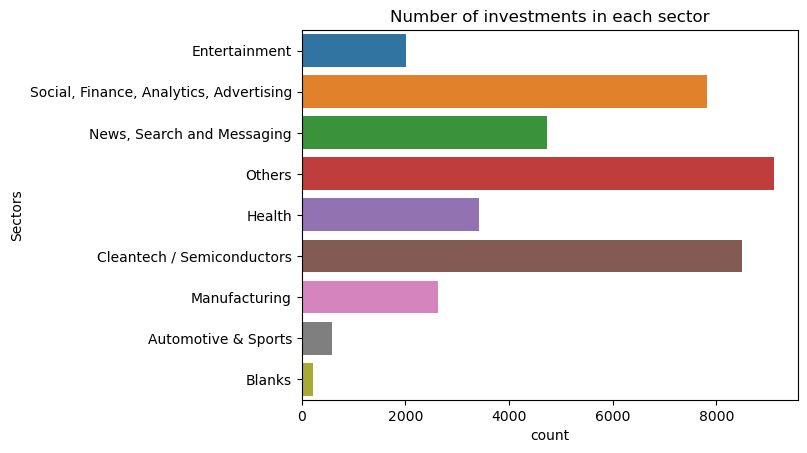

In [63]:
# Preview the number of investors in each sectors
sns.countplot(y=sector_df.main_sector)
plt.title('Number of investments in each sector')
plt.ylabel('Sectors');

# Checkpoint 5 : Sector Analysis 2

Now we have to identify the heavily invested sector for each of the top 3 country so we will get  a detailed view about companies in each country

In [64]:
# filter the raised amount between 5M to 15M as its the preffered Spark fund's investment range
sector_FT_df = sector_df.query("5000000 <= raised_amount_usd <= 15000000")

In [65]:
# lets now split the counrties to respective dataframe
D1 = sector_FT_df.query("country_code == 'USA'")
D2 = sector_FT_df.query("country_code == 'GBR'")
D3 = sector_FT_df.query("country_code == 'IND'")

## Table 5.1 Sector-wise Investment Analysis

In [66]:
# find total number of investments
("US",D1.shape[0]),("UK",D2.shape[0]),("IND",D3.shape[0])

(('US', 12150), ('UK', 628), ('IND', 330))

In [67]:
# find total amount invested in USD
("US",D1['raised_amount_usd'].sum()),("UK",D2['raised_amount_usd'].sum()),("IN",D3['raised_amount_usd'].sum())

(('US', 108531347515.0), ('UK', 5436843539.0), ('IN', 2976543602.0))

In [68]:
# find the top sectors based on no. of investments for USA
print("USA")
D1['main_sector'].value_counts().sort_values(ascending=False).astype(int).to_frame()

USA


,main_sector
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350
"News, Search and Messaging",1583
Health,909
Manufacturing,799
Entertainment,591
Automotive & Sports,167
Blanks,86


In [69]:
# find the top sectors based on no. of investments for GBR/UK
print("UK")
D2['main_sector'].value_counts().sort_values(ascending=False).astype(int).to_frame()

UK


,main_sector
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130
"News, Search and Messaging",73
Entertainment,56
Manufacturing,42
Health,24
Automotive & Sports,16
Blanks,7


In [70]:
# find the top sectors based on no. of investments for India
print("India")
D3['main_sector'].value_counts().sort_values(ascending=False).astype(int).to_frame()

India


,main_sector
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52
Entertainment,33
Manufacturing,21
Cleantech / Semiconductors,20
Health,19
Automotive & Sports,13
Blanks,2


<b> Observation and action steps</b><br>
From above observation lets get the top 1 and 2 sectors for each conutry to find the companies with highest investment

In [71]:
D1.loc[D1.main_sector == 'Social, Finance, Analytics, Advertising',['company_permalink','raised_amount_usd']].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

In [72]:
D2.loc[D2.main_sector == 'Social, Finance, Analytics, Advertising',['company_permalink','raised_amount_usd']].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [73]:
D3.loc[D3.main_sector == 'News, Search and Messaging',['company_permalink','raised_amount_usd']].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/organization/gupshup-technology-india-pvt-ltd    33000000.0
/organization/imimobile                           23000000.0
/organization/sms-gupshup                         22000000.0
/organization/hike                                21000000.0
/organization/roadrunnr                           21000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

# Report

I have first created a visualizationn that represents the funding type to be selected for the investment range 5M - 15M as that was our first step of analysis.

## 1. Plot showing the representative amount of investment in each funding type highlighting Venture

In [74]:
# aggregate the values for raised amount for each funding type
ft_data = master_frame.set_index('funding_round_type').groupby(by='funding_round_type')['raised_amount_usd'].agg(['mean','median'])

In [75]:
# Preview the values
ft_data

,mean,median
funding_round_type,,
angel,9.586945e+05,400000.0
private_equity,7.330859e+07,20000000.0
seed,7.198180e+05,275000.0
venture,1.174895e+07,5000000.0


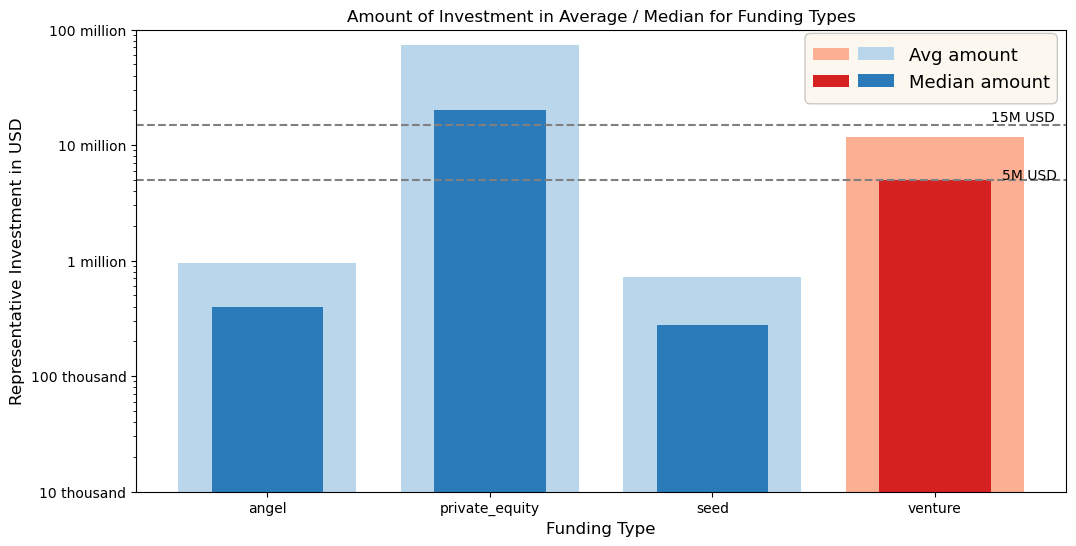

In [76]:
# create a figure and set styles and scale as logs as we will be handling millions and trillion value
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.yscale('log')

# create color for bars to differenciate mean and median 
b = (0.16696655132641292, 0.48069204152249134, 0.7291503267973857)
lb = (0.7309496347558632, 0.8394771241830065, 0.9213225682429834)
r = (0.8370472895040368, 0.13394848135332565, 0.13079584775086506)
lr = (0.9882352941176471, 0.6866743560169165, 0.5778854286812765)

#Plot the bar for Mean
plt.bar(ft_data.index,ft_data['mean'],color=[lb,lb,lb,lr],label='Average');

#Plot the bar for median
plt.bar(ft_data.index,ft_data['median'],color=[b,b,b,r],width=0.5,label='Median');

# label the axis and give title
plt.title("Amount of Investment in Average / Median for Funding Types")
plt.ylabel("Representative Investment in USD",size=12)
plt.xlabel("Funding Type",size=12)
plt.yticks(plt.gca().get_yticks()[:-1],['10 thousand','100 thousand','1 million','10 million','100 million']);

# add a text for highlighting the range of 5M to 15M
plt.text(3.25,15.e+06 + 10.e+05,'15M USD')
plt.axhline(15.e+06,linestyle='--',c='grey')
plt.text(3.3,5.e+06 + 10.e+04,'5M USD')
plt.axhline(5.e+06,linestyle='--',c='grey');

# add custom legend to identify what the bars are
custom_legend_one = [Patch(facecolor=(0.7309496347558632, 0.8394771241830065, 0.9213225682429834),label='Average'),
                       Patch(facecolor=(0.16696655132641292, 0.48069204152249134, 0.7291503267973857),label='Median')]
custom_legend_two =[Patch(facecolor=(0.9882352941176471, 0.6866743560169165, 0.5778854286812765),label='Average'),
                       Patch(facecolor=(0.8370472895040368, 0.13394848135332565, 0.13079584775086506),label='Median')]
ax = plt.gca()
l1 = ax.legend(custom_legend_one, ['Avg amount', 'Median amount'],prop={'size': 13},frameon=False)
ax.add_artist(l1)
ax.legend(custom_legend_two, ['', ''],prop={'size': 13},loc=(0.72,0.851),frameon=False)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
ax.text(0.725,0.98, '                                          \n \n ', transform=ax.transAxes, fontsize=13, verticalalignment='top', bbox=props);

<br><br>
## 2. Plot showing the top 9 countries against the total amount of investments of funding type Venture

In [77]:
# Taking the sum of raised amount for respective countries considering only the top 9 countries
top9_data = top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index()[:9]

In [78]:
# create a column to identiry english speaking countries in top 9
top9_data['english'] = list(map(lambda x: 'English' if x else 'Non-English',top9_data['country_code'].isin(top9_en.country_code.unique())))

In [79]:
# creating a color scale for english speaking and non englishspeaking to differenciate it clearly
color_seq = pd.Series(np.arange(9), dtype=object) # create empty series for the color column

# storing the length of both type of countries in seperate variable
eng_count = (top9_data['english'] == 'English').sum()
non_eng_count = (top9_data['english'] == 'Non-English').sum()

#Assigning color palette for each country
eng_color = sns.color_palette("Reds", eng_count)
non_eng_color = sns.color_palette("Blues", non_eng_count)

# Assign color palette scale by high to lowest amount value
for index, occ in enumerate(top9_data['english']):
    if occ == 'English':
        color_seq[index]=eng_color[eng_count-1]
        eng_count = eng_count -1
    else :
        color_seq[index]=non_eng_color[non_eng_count-1]
        non_eng_count = non_eng_count -1

#Assign the newly created series to the dataframe
top9_data['color'] = color_seq

In [80]:
# Preview the color code scale column
top9_data

,country_code,raised_amount_usd,english,color
0,USA,4.225108e+11,English,"(0.6943944636678201, 0.07003460207612457, 0.09..."
1,CHN,3.983542e+10,Non-English,"(0.09019607843137256, 0.39294117647058824, 0.6..."
2,GBR,2.024563e+10,English,"(0.8901960784313725, 0.18562091503267975, 0.15..."
3,IND,1.439186e+10,English,"(0.9835755478662053, 0.4127950788158401, 0.288..."
4,CAN,9.583332e+09,English,"(0.9882352941176471, 0.6261437908496732, 0.508..."
5,FRA,7.259537e+09,Non-English,"(0.2909803921568628, 0.5945098039215686, 0.789..."
6,ISR,6.907515e+09,English,"(0.9935870818915802, 0.8323414071510957, 0.762..."
7,DEU,6.346960e+09,Non-English,"(0.5796078431372549, 0.7701960784313725, 0.873..."
8,JPN,3.363677e+09,Non-English,"(0.8141176470588235, 0.883921568627451, 0.9498..."


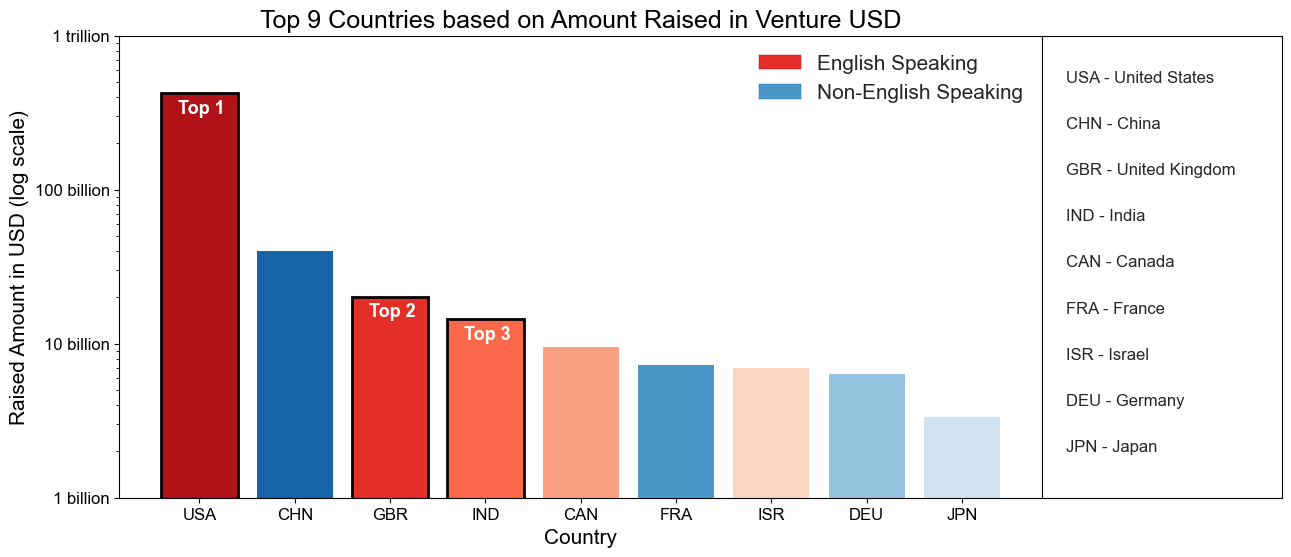

In [81]:
# Create a figure with 2 columsn and 1 row defining the width of each plot and size of the figure
fig, ax = plt.subplots(1,2,figsize=(15,6),gridspec_kw={'width_ratios':[5,1.3]})

# remove white space between subplots and margins for second plot to combine it to a single plot
plt.subplots_adjust(wspace=0,hspace=0)
plt.style.use('seaborn')
ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
#plt.margins(0,0.03)
#ax[0].set_xmargin(0.03)

# Create a bar plot for countires based on its raised amount  
bars = ax[0].bar(top9_data.country_code,'raised_amount_usd',data=top9_data,color=top9_data['color']);

# Add text for top 3 english speaking conutry
j=0
for i,bar in enumerate(bars):  
    if i in [0,2,3]:
        j += 1
        bar.set_edgecolor("black")
        bar.set_linewidth(2)
        ax[0].text(x=i-0.225,y=bar.get_height()-bar.get_height()*0.20,s="Top %s" % str(j),va="center",fontdict=dict(fontsize=13,color="w",fontweight="bold"))
del j

# Create custom legend to differentiate English and non ENglish speaking countires
custom_legend = [Patch(facecolor=(0.8901960784313725, 0.18562091503267975, 0.15294117647058825), edgecolor=(0.6943944636678201, 0.07003460207612457, 0.09231833910034601),label='English Speaking'),
               Patch(facecolor=(0.2909803921568628, 0.5945098039215686, 0.7890196078431373), edgecolor=(0.09019607843137256, 0.39294117647058824, 0.6705882352941177),label='Non-English Speaking'),''];
ax[0].legend(custom_legend, ['English Speaking', 'Non-English Speaking'],prop={'size': 15})

# add legend for each country in subplot 2
for i,label in enumerate(["USA - United States", "CHN - China", "GBR - United Kingdom", "IND - India", "CAN - Canada", "FRA - France", "ISR - Israel", "DEU - Germany", "JPN - Japan"]):
    ax[1].text(0.1,0.9 - i/10,label,transform=ax[1].transAxes,size=12)

# Set the labels and tickmarks for the plot
ax[0].set_xlabel('Country',size=15)
ax[0].set_ylabel('Raised Amount in USD (log scale)',size=15)
ax[0].set_title('Top 9 Countries based on Amount Raised in Venture USD',fontsize=18)
ax[0].set_yscale('log')
ax[0].set_yticks([1.e+09, 1.e+10, 1.e+11, 1.e+12])
ax[0].set_yticklabels(['1 billion','10 billion','100 billion','1 trillion'])
ax[0].tick_params(axis='both', labelsize=12)

<br><br>
## 3. Plot showing the number of investments in the top 3 sectors of the top 3 countries

In [82]:
# Preview the dataset for top3 countires
sector_FT_df.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,/organization/-fame,#fame,Media,IND,Media,Entertainment
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,/organization/0xdata,H2O.ai,Analytics,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps,"News, Search and Messaging"
17,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,USA,Service Providers,Others
20,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,USA,Manufacturing,Manufacturing


In [83]:
# create a dataframe for the number of each main sectors for respective countries
sector_FT_group = sector_FT_df.groupby('country_code')['main_sector'].value_counts().to_frame()

# Convert it to percentage values
sector_FT_data = sector_FT_group.groupby(by='country_code').transform(lambda x: x / x.sum())

# rename column and sort based on it value
sector_FT_data.columns = ['Percentage Ratio of Investment']
sector_FT_data = sector_FT_data.reset_index().sort_values(['country_code','main_sector']).reset_index(drop=True)

In [84]:
# Preview the head of dataframe
sector_FT_data.head()

,country_code,main_sector,Percentage Ratio of Investment
0,GBR,Automotive & Sports,0.025478
1,GBR,Blanks,0.011146
2,GBR,Cleantech / Semiconductors,0.207006
3,GBR,Entertainment,0.089172
4,GBR,Health,0.038217


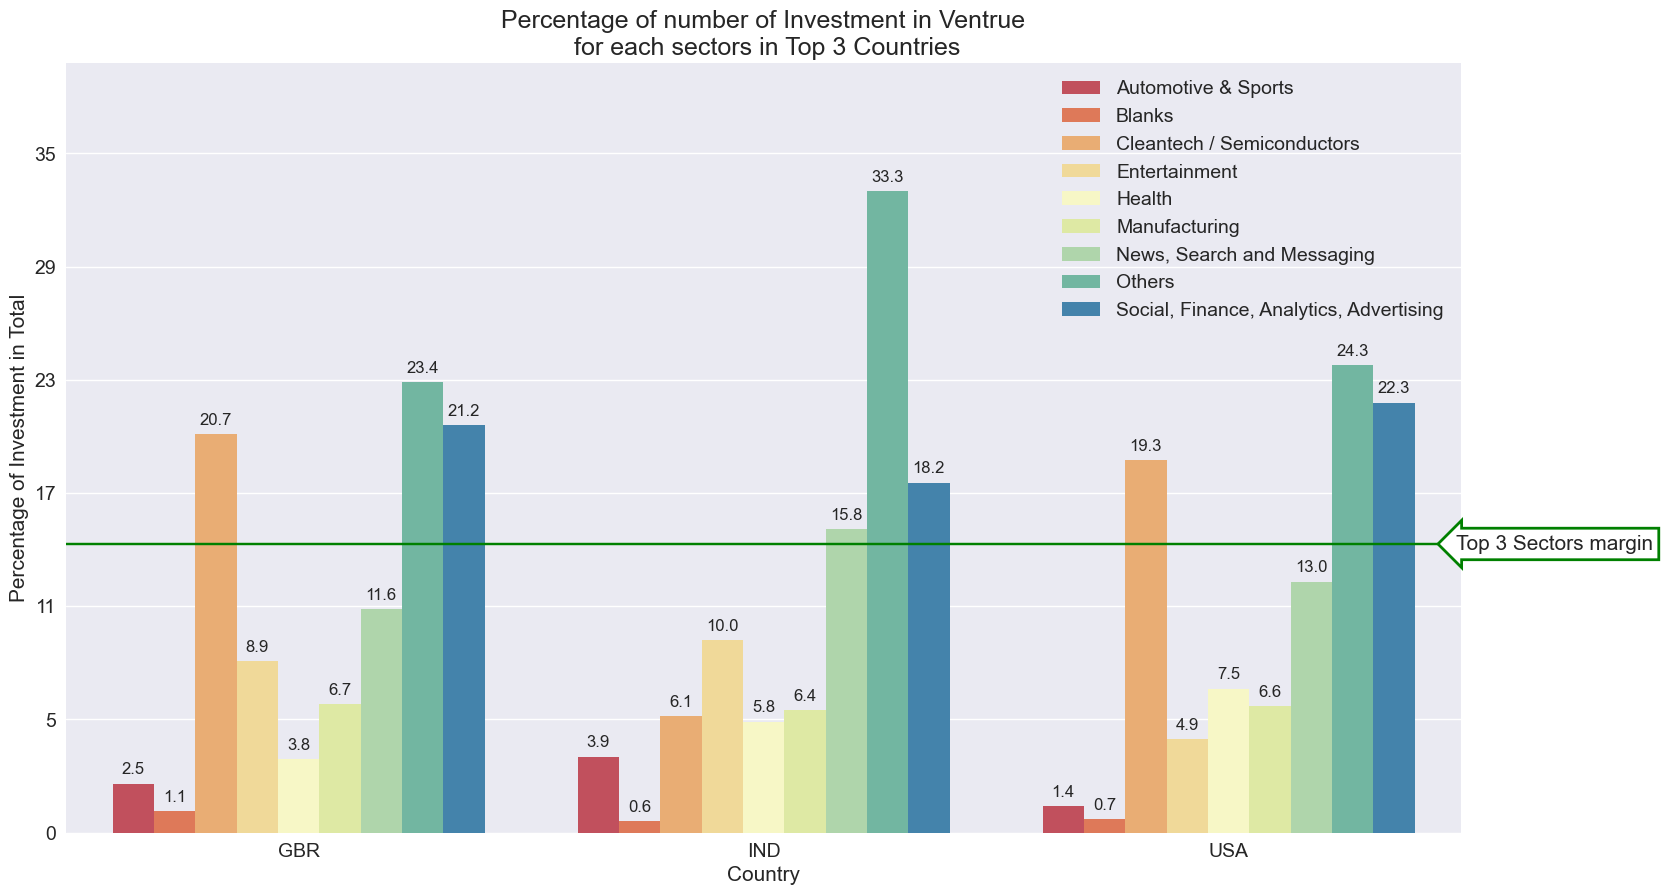

In [85]:
# Create a figure
plt.figure(figsize=(18,10))

# Creata bar plot for counrties based on Percentage Ratio of Investment for each sector
ax = sns.barplot('country_code','Percentage Ratio of Investment',hue='main_sector',data=sector_FT_data,palette='Spectral',)

# set y tick and its label to display percentage ration up insdeat of floating scale values 
ax.set_yticks(np.linspace(0,1,18))
ax.set_yticklabels((np.linspace(0,100,18)).astype(int));

# limit it to display the y axis upto 40%
plt.ylim(0,0.4);

# set plot title and labels and its font size
plt.title("Percentage of number of Investment in Ventrue\n for each sectors in Top 3 Countries",size=18);
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Country',fontsize=15);
ax.set_ylabel('Percentage of Investment in Total',fontsize=15)
plt.legend(prop={'size': 14})

# add percentage value above each bars
#country = list(sector_FT_data.country_code.unique())
#for index,row in sector_FT_data.iterrows():
#    ax.text(country.index(row.country_code)-(-index*0.09)-0.39-country.index(row.country_code)*0.8125,row['Percentage Ratio of Investment']+0.005,round(row['Percentage Ratio of Investment']*100,1),size=12)

# add text above bars
for p in ax.patches:
    height = p.get_height()
    ax.text((p.get_x()+p.get_width()/2.),height+0.005,"{:1.1f}".format(height*100),ha="center",size=12) 

# add horizontal line seperating top3 sectors from others 
ax.axhline(0.15,color='g');
ax.text(2.7, 0.15, "Top 3 Sectors margin", ha="center", va="center", size=15,bbox=dict(boxstyle="larrow,pad=0.3",ec='g', lw=2,color='w'));

Now we can represent the top 3 sectors in seperate plot

In [86]:
# get the sectors which are on the top three in each country
sectors = ['Cleantech / Semiconductors','Social, Finance, Analytics, Advertising','Others','News, Search and Messaging']

# filter out other sectors to a new dataframe 
sector_FT_top3 = sector_FT_df[sector_FT_df['main_sector'].isin(sectors)].groupby('country_code')['main_sector'].value_counts().to_frame()
sector_FT_top3.columns = ['Count']
sector_FT_top3 = sector_FT_top3.reset_index()

# remove cleantech... from IND and News... from USA and GBR
for country in ['GBR','IND','USA']:
    if country == 'IND':
        sector_FT_top3.loc[(sector_FT_top3.country_code == country) & ~((sector_FT_top3.main_sector.isin(sectors[1:]))),'Count'] = 0
    else :
        sector_FT_top3.loc[(sector_FT_top3.country_code == country) & ~((sector_FT_top3.main_sector.isin(sectors[:-1]))),'Count'] = 0

# set index as countrycode
sector_FT_top3 = sector_FT_top3.set_index('country_code')
sector_FT_top3

,main_sector,Count
country_code,,
GBR,Others,147
GBR,"Social, Finance, Analytics, Advertising",133
GBR,Cleantech / Semiconductors,130
GBR,"News, Search and Messaging",0
IND,Others,110
IND,"Social, Finance, Analytics, Advertising",60
IND,"News, Search and Messaging",52
IND,Cleantech / Semiconductors,0
USA,Others,2950


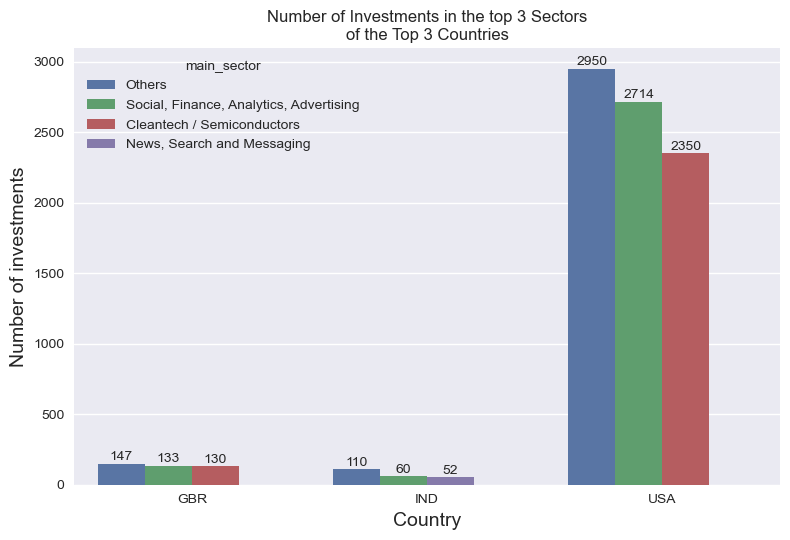

In [87]:
# Create a count plot for number of sectors from top 3 for its respective countries
ax = sns.barplot(sector_FT_top3.index,y='Count',hue='main_sector',data=sector_FT_top3);

# remove borders
sns.despine(top=True, right=True, left=False, bottom=True)

# add text above bars
for i,p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    if height > 0:
        #if ax.patches[i-3].get_height() == 0 & i-3 >= 0:
        if i == 10:
            p.set_x(p.get_x()-width)
        ax.text((p.get_x()+width/2.),height + 25,"{:1.0f}".format(height),ha="center")
        

# set title and axis labels
plt.title('Number of Investments in the top 3 Sectors\nof the Top 3 Countries')
plt.xlabel('Country',size=14)
plt.ylabel('Number of investments',size=14);
plt.tight_layout();

<br><br><center><h2>Overview of sectors for Top 3 Countries</h2></center>

In [88]:
sector_FT_group =sector_FT_df.groupby(['country_code','main_sector']).agg({'main_sector':pd.Series.count,'raised_amount_usd':np.sum})
sector_FT_group.columns = ['Number of Investment','Total Amount in Millions']
sector_FT_group['Total Amount in Millions'] = sector_FT_group['Total Amount in Millions'].apply(lambda x: "%.1f" % (x/1000000))
sector_FT_group.unstack('country_code')

Number of Investment             \
country_code                                             GBR  IND   USA   
main_sector                                                               
Automotive & Sports                                       16   13   167   
Blanks                                                     7    2    86   
Cleantech / Semiconductors                               130   20  2350   
Entertainment                                             56   33   591   
Health                                                    24   19   909   
Manufacturing                                             42   21   799   
News, Search and Messaging                                73   52  1583   
Others                                                   147  110  2950   
Social, Finance, Analytics, Advertising                  133   60  2714   

                                        Total Amount in Millions          \
country_code                                                 GBR     IND   
main_sector                                                                
Automotive & Sports                                        167.1   136.9   
Blanks                                                      57.8    27.0   
Cleantech / Semiconductors                                1164.0   165.4   
Entertainment                                              482.8   280.8   
Health                                                     214.5   167.7   
Manufacturing                                              361.9   200.9   
News, Search and Messaging                                 615.7   433.8   
Others                                                    1283.6  1013.4   
Social, Finance, Analytics, Advertising                   1089.4   550.5   

                                                  
country_code                                 USA  
main_sector                                       
Automotive & Sports                       1454.1  
Blanks                                     764.8  
Cleantech / Semiconductors               21633.4  
Entertainment                             5099.2  
Health                                    8211.9  
Manufacturing                             7258.6  
News, Search and Messaging               13971.6  
Others                                   26321.0  
Social, Finance, Analytics, Advertising  23807.4

## Conclusion

Spark funds can invest in the following companies from Top sectors 
<b><center>Top Sectors</center></b>
<table>
    <tr><th></th><th>USA</th><th>GBR</th><th>IND</th>
    <tr><td>Top 1 Sector </td><td>Others</td><td>Others</td><td>Others</td></tr>
    <tr><td>Top 2 Sector</td><td>Social, Finance, Analytics, Advertising</td><td>Social, Finance, Analytics, Advertising</td><td>Social, Finance, Analytics, Advertising</td></tr>
</table>

These sectors are in the lead with most investments at the range 5M to 15 M for the <b>fundng type Venture</b>

<b><center>Top Companies</center></b>
<table>
    <tr><th></th><th>USA</th><th>GBR</th><th>IND</th>
    <tr><td>Top 1 Company</td><td>/organization/virtustream</td><td>/organization/electric-cloud</td><td>/organization/firstcry-com</td></tr>
<tr><td>Top 2 Company</td><td>/organization/shotspotter</td><td>/organization/celltick-technologies</td><td>/organization/manthan-systems</td></tr>
</table>

These companies has highest investment amount in the top sectors within the investment range which Spark funds can invest in